# Video Game Sales Exploratory Analysis

Data available at: https://www.kaggle.com/gregorut/videogamesales

This notebook still is a work in progress.

In this notebook i'm trying to think as a decision taker of a game dev studio, just analyzing the data to gather knowledge and aid in a decision

You can contact-me on my <a href='https://www.linkedin.com/in/ramonrcn/'>LinkedIn profile</a>

In [33]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading and basic pre-processing

In [2]:
#reading the data

vg = pd.read_csv('vgsales.csv')
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
vg.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


One thing wrong here: Max year 2020. The dataset has registers up to 2017. We'll address it later

In [6]:
# Checking for NaN's
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Deleting the entries with NaN's
vg.dropna(subset = ['Year','Publisher'], how = 'any', axis = 0, inplace = True)

# Setting the year as int
vg.Year = vg.Year.astype(int)

#Checking the Df info again
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# Fixing one registry, the game came out in 2009, and the data go up to early 2017
## After a quick filter and google search, i found out that the game came out in '09
## vg.loc[vg.Year == 2020]

vg.Year.replace(2020, 2009, inplace= True)

## Which Platform choose? and what genre?

If i was representing a game development studio, I wonder what platform has the biggest marketshare, and what genres could perform better in each platform. So let's get to it.

In [35]:
# Consolidating the data in another DataFrame

'''This dataframe contains all the sales data ordered by platform and global sales. It already meets my specification of knowing
what genre does best at each platform. But its tedious to read and takes too long to absorb the information'''

cons = vg.groupby(['Platform','Genre'], as_index = True).sum()
cons.drop(['Rank','Year'], axis= 1, inplace = True)
cons.sort_values(by = ['Platform','Global_Sales'], ascending = False, inplace = True)
cons.head(24)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Genre                                                                
XOne     Shooter          31.78     15.27      0.16         4.38         51.61
         Action           19.45     11.47      0.05         2.81         33.79
         Sports           14.26      7.67      0.02         2.03         23.97
         Role-Playing      5.56      3.06      0.01         0.83          9.48
         Racing            3.94      4.16      0.05         0.68          8.80
         Misc              4.44      1.82      0.01         0.61          6.86
         Adventure         1.20      1.08      0.03         0.20          2.51
         Fighting          1.58      0.52      0.01         0.23          2.31
         Platform          0.44      0.29      0.00         0.07          0.81
         Simulation        0.28      0.21      0.00         0.05          0.54
         Strategy          0.26      0.10      0.00         0.03          0.38
XB       Shooter          45.11     14.94      0.24         1.84         62.12
         Sports           39.97     10.78      0.16         1.98         53.05
         Action           33.19     12.21      0.33         1.71         47.46
         Racing           21.43      8.66      0.17         1.06         31.42
         Role-Playing      9.89      3.04      0.08         0.50         13.51
         Fighting          9.45      2.59      0.36         0.40         12.83
         Platform          6.58      2.70      0.01         0.34          9.66
         Misc              6.42      1.88      0.00         0.27          8.67
         Simulation        5.43      1.43      0.03         0.22          7.11
         Adventure         2.22      0.73      0.00         0.07          3.06
         Strategy          2.05      0.61      0.00         0.08          2.78
         Puzzle            0.32      0.08      0.00         0.01          0.42
X360     Shooter         173.37     76.29      3.05        24.43        277.23

In [34]:
# Gathering the same data as the above DF, but in a more 'plot friendly shape'

cons2 = vg.groupby(['Platform','Genre'], as_index = False).sum()
cons2.drop(['Rank','Year'], axis= 1, inplace = True)
cons2.sort_values(by = ['Platform','Global_Sales'], ascending = False, inplace = True)

# Filtering the games that sold more than 4 mil. copies, to generate a cleaner plot
cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False)

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
153,PS3,Action,119.82,109.26,28.95,46.00,304.02
244,Wii,Sports,149.94,94.87,18.25,26.90,289.95
266,X360,Shooter,173.37,76.29,3.05,24.43,277.23
141,PS2,Action,127.71,71.34,25.72,47.61,272.43
151,PS2,Sports,128.25,66.55,24.69,43.18,262.64
258,X360,Action,139.62,75.85,2.77,21.36,239.67
237,Wii,Misc,119.46,65.00,13.71,19.13,217.43
161,PS3,Shooter,81.71,75.10,8.80,30.18,195.80
147,PS2,Racing,74.73,46.61,5.88,27.11,154.21
37,DS,Misc,54.98,35.65,37.26,9.75,137.67


In [11]:
# Setting the colors used in the plots below, fell free to try any other color palette

#palette=sns.diverging_palette(128,240,79,32,1,n=12)
#palette= sns.color_palette("YlGnBu", 12)

clrz = ['#d70909',"#f26522",'#0000ff','#FFE00E','#a864a8','#790000','#005826','#00bff3','#636363','#8dc63f','#440e62','#ec008c']

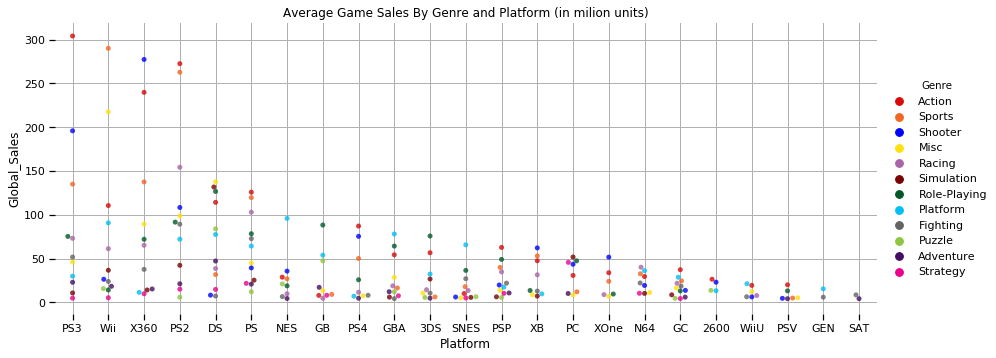

In [36]:
# Ploting all the data from the DF above

with sns.plotting_context('notebook'):
    
    sns.catplot(data = cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False),
                x= 'Platform', y= 'Global_Sales', hue= 'Genre', ci = None, kind= 'swarm', 
                dodge = False, alpha = .8, aspect=2.5, marker = 'o', palette=sns.color_palette(clrz))
    
    sns.despine(left= True, bottom=True)
    plt.title('Average Game Sales By Genre and Platform (in milion units)')
    plt.grid(axis='both',which='major')
    plt.show()


This plot gives a good idea of the average sales number, but is kinda hard to see, so i plotted the graph below

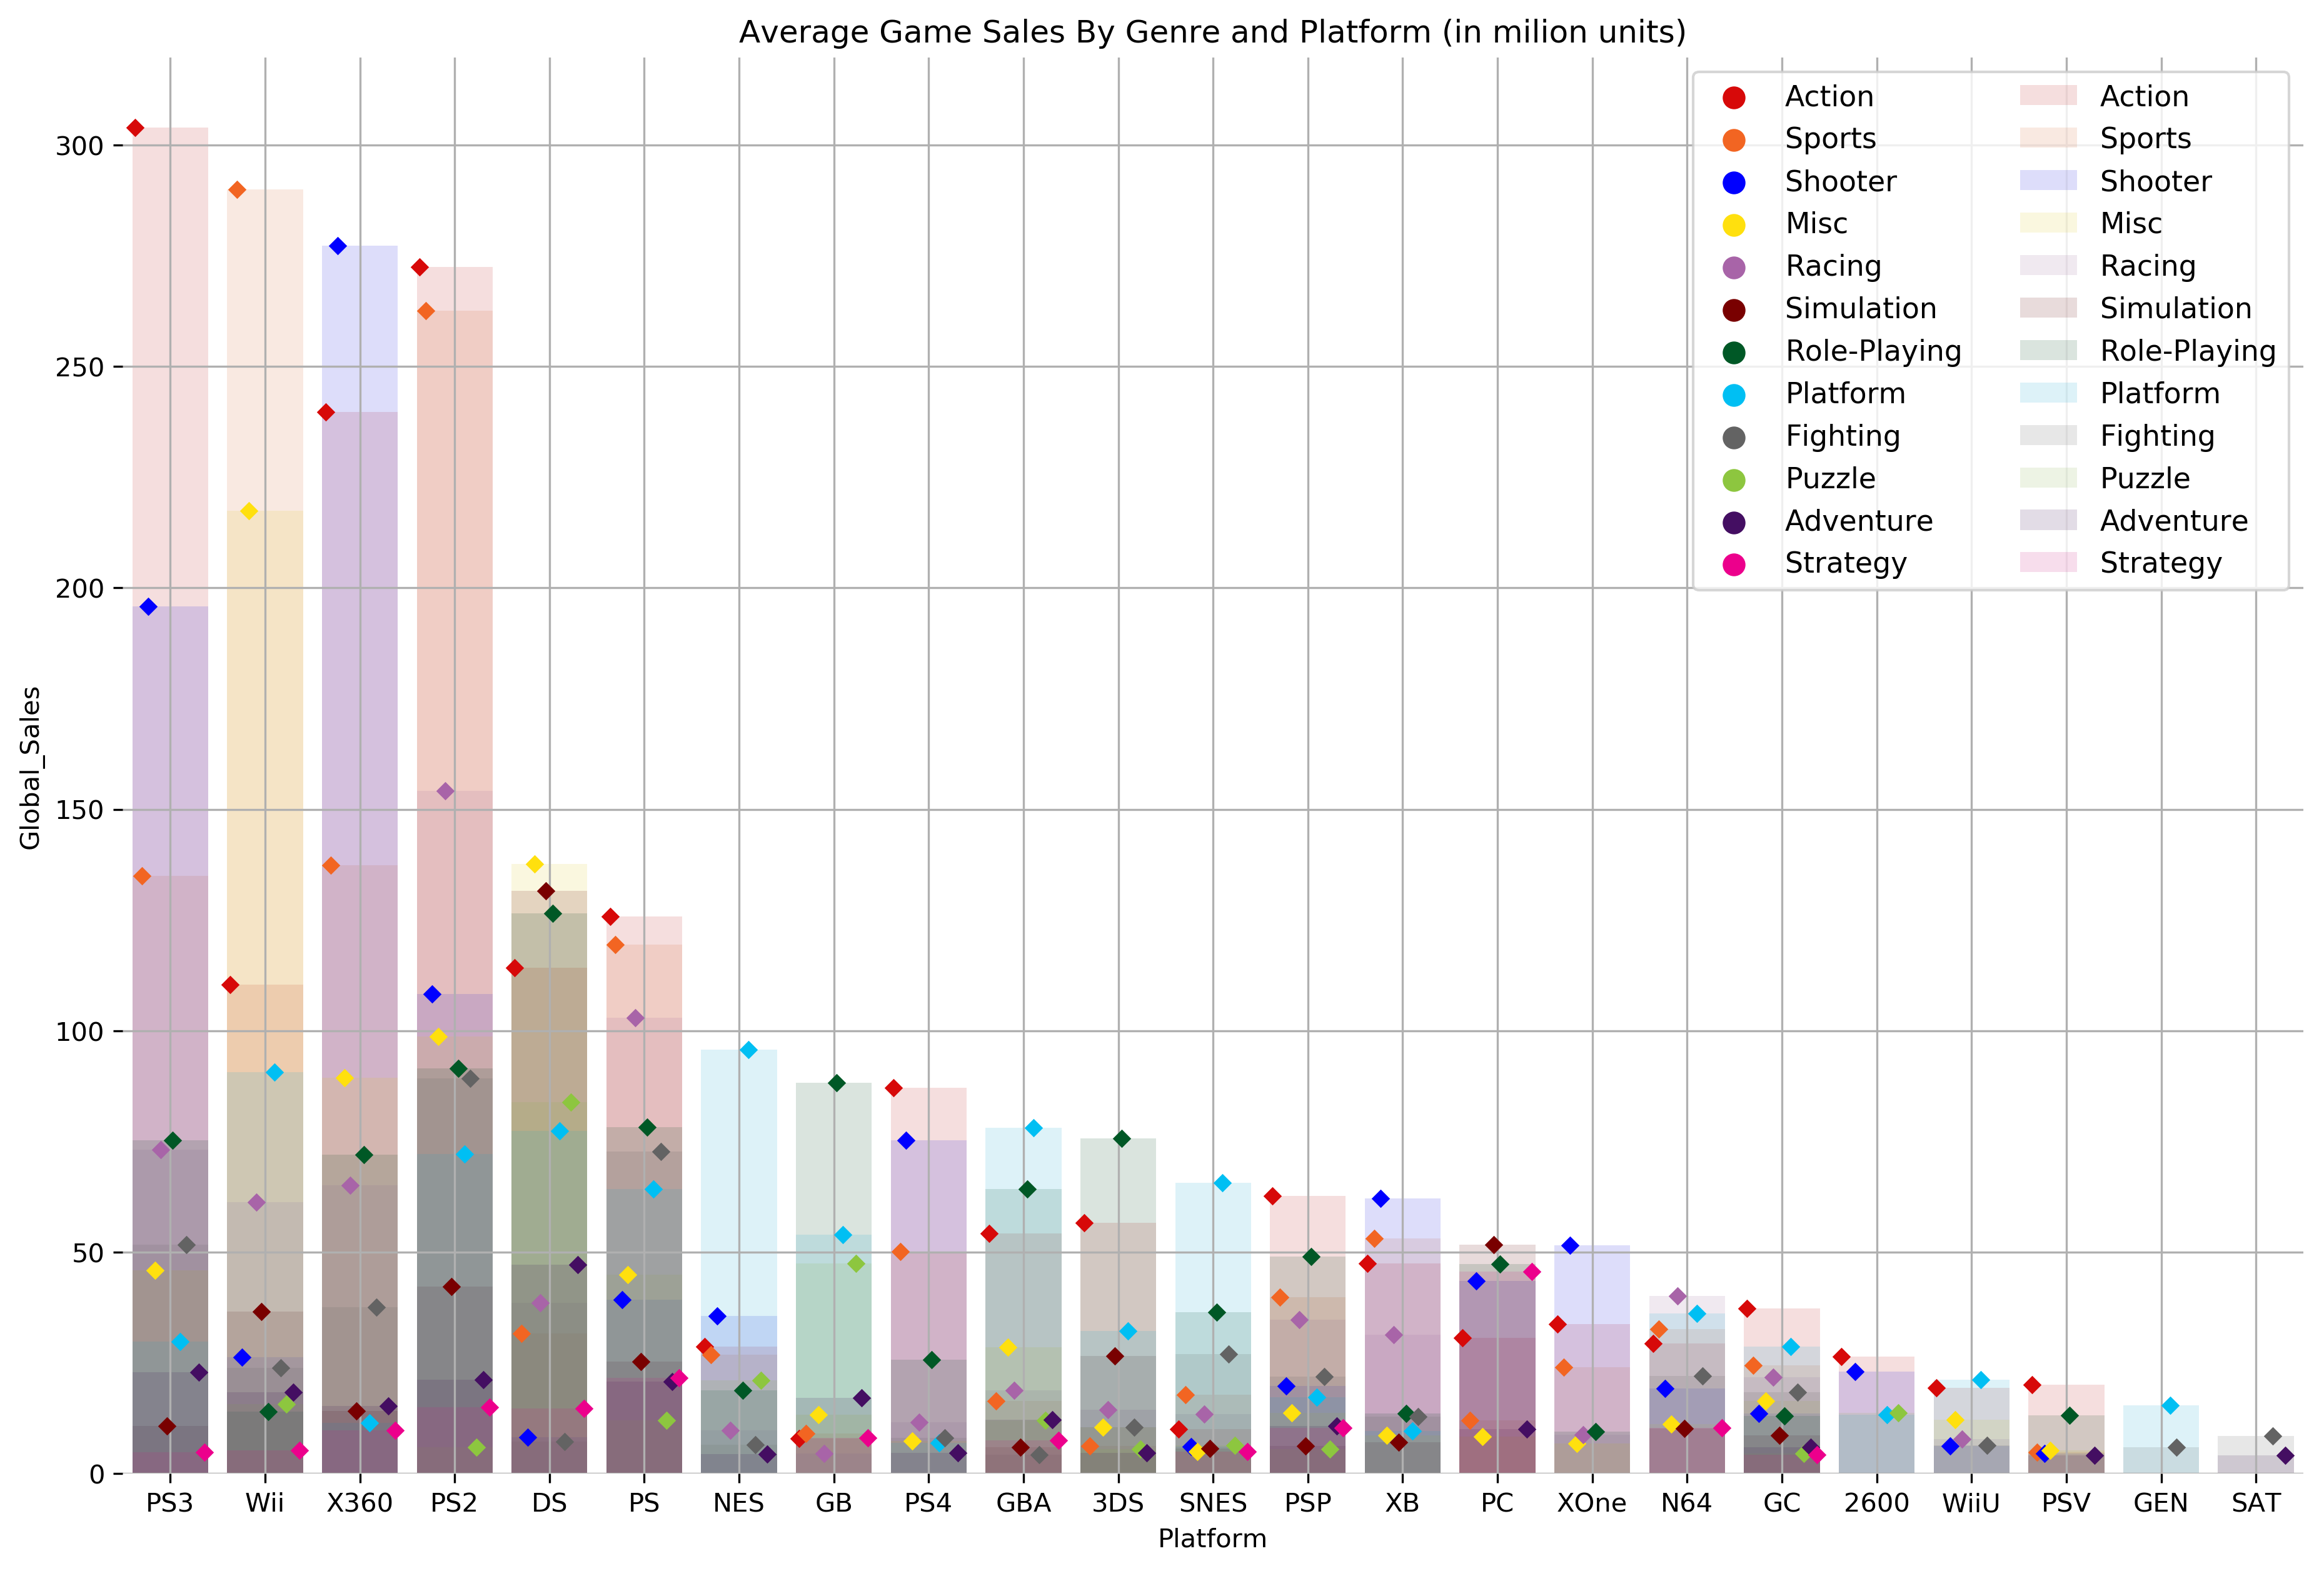

In [37]:
# Plotting a better graph

#This is an overlayed plot
f, ax = plt.subplots(ncols=1,nrows=1,sharey=True,figsize=(15, 10),dpi = 300)

with sns.plotting_context('notebook'):
    
    g = sns.barplot(data=cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False), x='Platform',
                y='Global_Sales', hue ='Genre', ci=None, dodge=False, alpha= .15,palette=sns.color_palette(clrz), ax=ax)
       
    g.set_xticklabels('')
    g.set_xlabel('')  
    
    ax2 = ax # Using the same axis (The ax.twinx method upsets the Y axis, and is a pain to realign later)
    
    g = sns.stripplot(data = cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False),
                x= 'Platform', y= 'Global_Sales', hue= 'Genre', palette=sns.color_palette(clrz),  
                dodge = True, alpha = 1, marker = 'D',ax=ax2  )
    sns.despine(left= True, bottom=True)
    plt.title('Average Game Sales By Genre and Platform (in milion units)')
    plt.grid(axis='both',which='major')
    plt.legend(ncol=2, frameon=True, loc='upper right')
    plt.show()


Ok, so we already know what genres do better in which platform. What about the regional preference?
What games and genres did well in each part of the world?

<a id='SalesGenreOverview'></a>

## Sales by Genre and Region overview

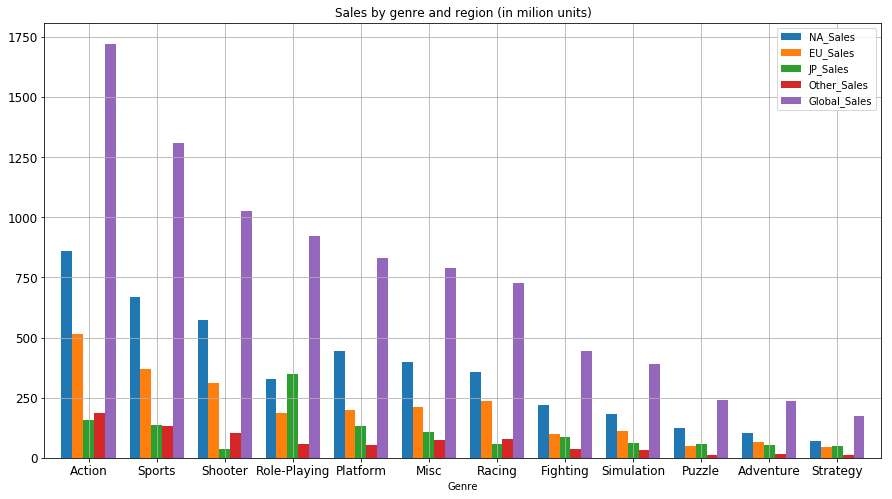

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In [38]:
# Sales by genre and region plot

regional = vg.groupby('Genre').sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1)
regional.plot(kind = 'bar', figsize = (15,8), rot= 0, fontsize = 12, grid= True, width=0.8)
plt.title('Sales by genre and region (in milion units)')
plt.show()
print()
regional

## Top 10 selling games by region

In [39]:
NA = vg.sort_values('NA_Sales',ascending = False).head(10)
EU = vg.sort_values('EU_Sales',ascending = False).head(10)
JP = vg.sort_values('JP_Sales',ascending = False).head(10)
Other = vg.sort_values('Other_Sales',ascending = False).head(10)
Global = vg.sort_values('Global_Sales',ascending = False).head(10)

#top10 = pd.concat([NA,EU,JP,Other,Global], axis = 0, ignore_index = True)

### North America

In [40]:
NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [42]:
NAg = NA.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='NA_Sales', ascending = False).reset_index()

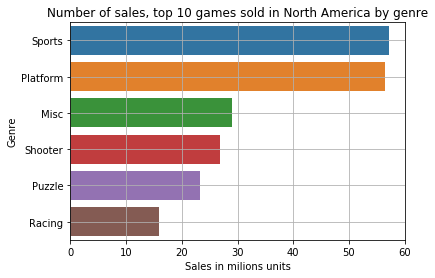

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,57.24,40.03,7.05,11.42,115.74
1,Platform,56.45,14.39,15.05,3.58,89.47
2,Misc,29.00,14.14,3.17,4.52,50.84
3,Shooter,26.93,0.63,0.28,0.47,28.31
4,Puzzle,23.20,2.26,4.22,0.58,30.26
5,Racing,15.85,12.88,3.79,3.31,35.82


In [43]:
sns.barplot(data=NAg, y='Genre',x='NA_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in North America by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
NAg

### Europe

In [44]:
EU

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [45]:
EUg = EU.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='EU_Sales', ascending = False).reset_index()

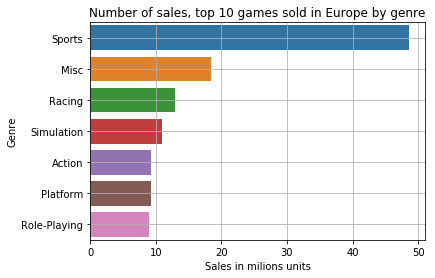

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,66.33,48.62,9.58,13.21,137.74
1,Misc,18.78,18.46,7.09,4.90,49.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Simulation,9.07,11.00,1.93,2.75,24.76
4,Action,7.01,9.27,0.97,4.14,21.40
5,Platform,11.38,9.23,6.50,2.90,30.01
6,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [46]:
sns.barplot(data=EUg, y='Genre',x='EU_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Europe by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
EUg

### Japan

In [47]:
JP

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


In [48]:
JPg = JP.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='JP_Sales', ascending = False).reset_index()

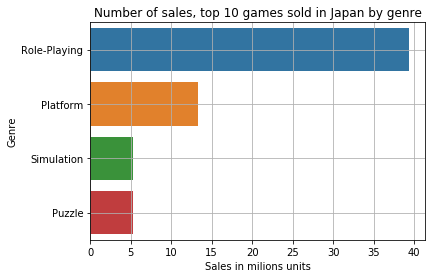

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Role-Playing,38.32,26.77,39.36,4.40,108.87
1,Platform,40.46,12.81,13.31,3.67,70.25
2,Simulation,2.55,3.52,5.33,0.88,12.27
3,Puzzle,3.44,5.36,5.32,1.18,15.30


In [49]:
sns.barplot(data=JPg, y='Genre',x='JP_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Japan by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
JPg

This kinda surprised me to be honest, each region has some preference over the others, let's take the Wii Sports as an exemple:
I remember when the Wii came out in '06, it was a huge hit, instant success all over the world, Except in Japan! it's homeland.

In fact, this shows how the japanese gamers prefer the portable platforms, like the DS, PSP and such. Other Japanese preference is the Pocket Monsters, Pokemon dominates the top 10 listing in Japan, and score a 5th place in most sold game worldwide.

### Other Regions

In [50]:
Other

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [51]:
Otherg = Other.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='Other_Sales', ascending = False).reset_index()

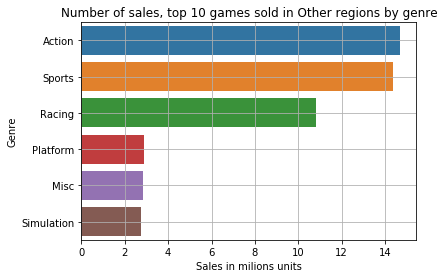

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16.44,9.67,1.38,14.71,42.21
1,Sports,57.29,40.03,7.69,14.35,119.37
2,Racing,18.86,12.89,4.89,10.84,47.48
3,Platform,11.38,9.23,6.50,2.90,30.01
4,Misc,14.03,9.20,2.93,2.85,29.02
5,Simulation,9.07,11.00,1.93,2.75,24.76


In [52]:
sns.barplot(data=Otherg, y='Genre',x='Other_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Other regions by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
Otherg

### Global Sales

In [53]:
Global

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [54]:
Globalg = Global.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='Global_Sales', ascending = False).reset_index()

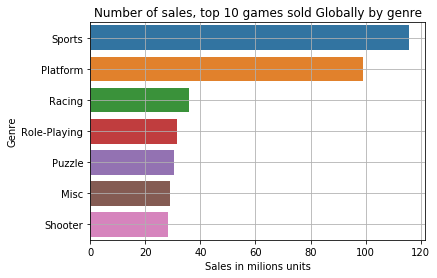

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,57.24,40.03,7.05,11.42,115.74
1,Platform,55.05,19.87,18.01,5.93,98.87
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Role-Playing,11.27,8.89,10.22,1.00,31.37
4,Puzzle,23.20,2.26,4.22,0.58,30.26
5,Misc,14.03,9.20,2.93,2.85,29.02
6,Shooter,26.93,0.63,0.28,0.47,28.31


In [55]:
sns.barplot(data=Globalg, y='Genre',x='Global_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold Globally by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
Globalg

Overall we can see that each region has their preferences in game genres and platforms  [as we can see in this plot ](#SalesGenreOverview) based on that info. we can already select some genres and regions to either make a deeper study, or analisys to take the decision of developing or not a new title with certain genre and target region

## Number of sales by Publisher

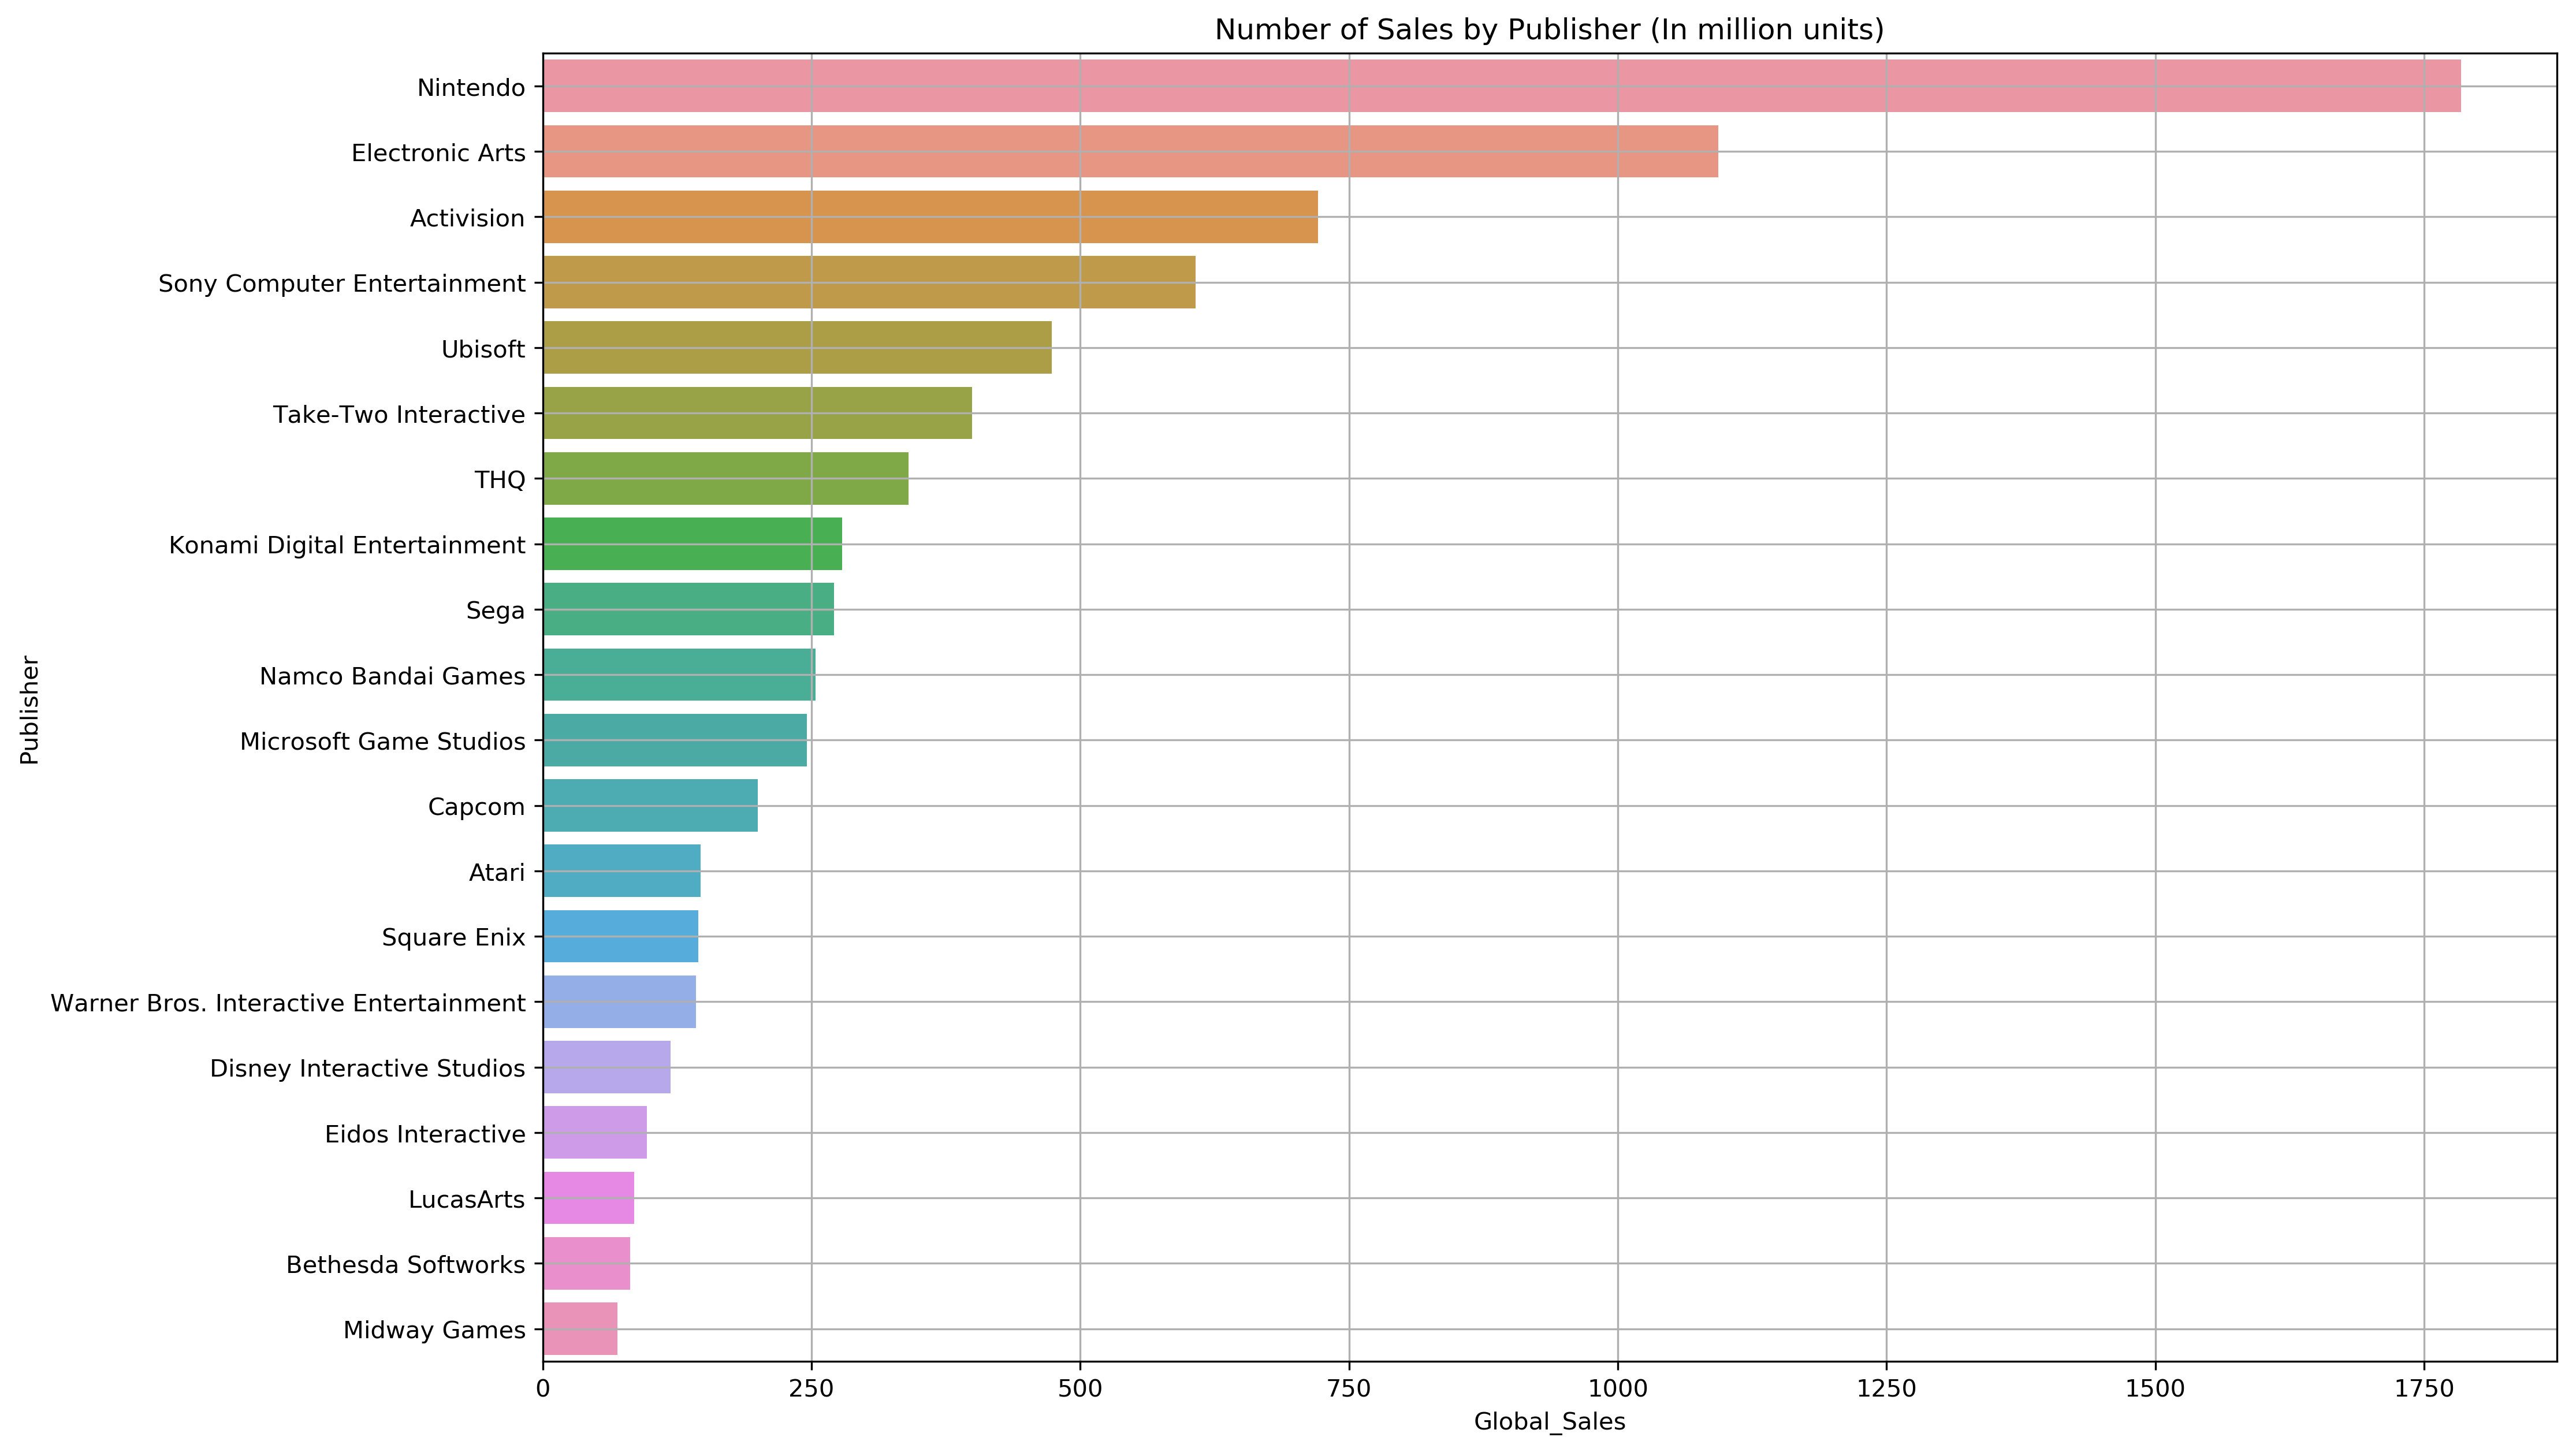

In [31]:
pub = vg.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1)

f = plt.figure(figsize=(15, 10),dpi = 300)
sns.barplot(data= pub.reset_index().head(20), x= 'Global_Sales', y='Publisher')
plt.grid(axis='both')
plt.title('Number of Sales by Publisher (In million units)')
plt.show()

Well, Nintendo is'nt called 'Big N' for nothing as we can clearly see in the above plot

## Number of sales by Publisher and region

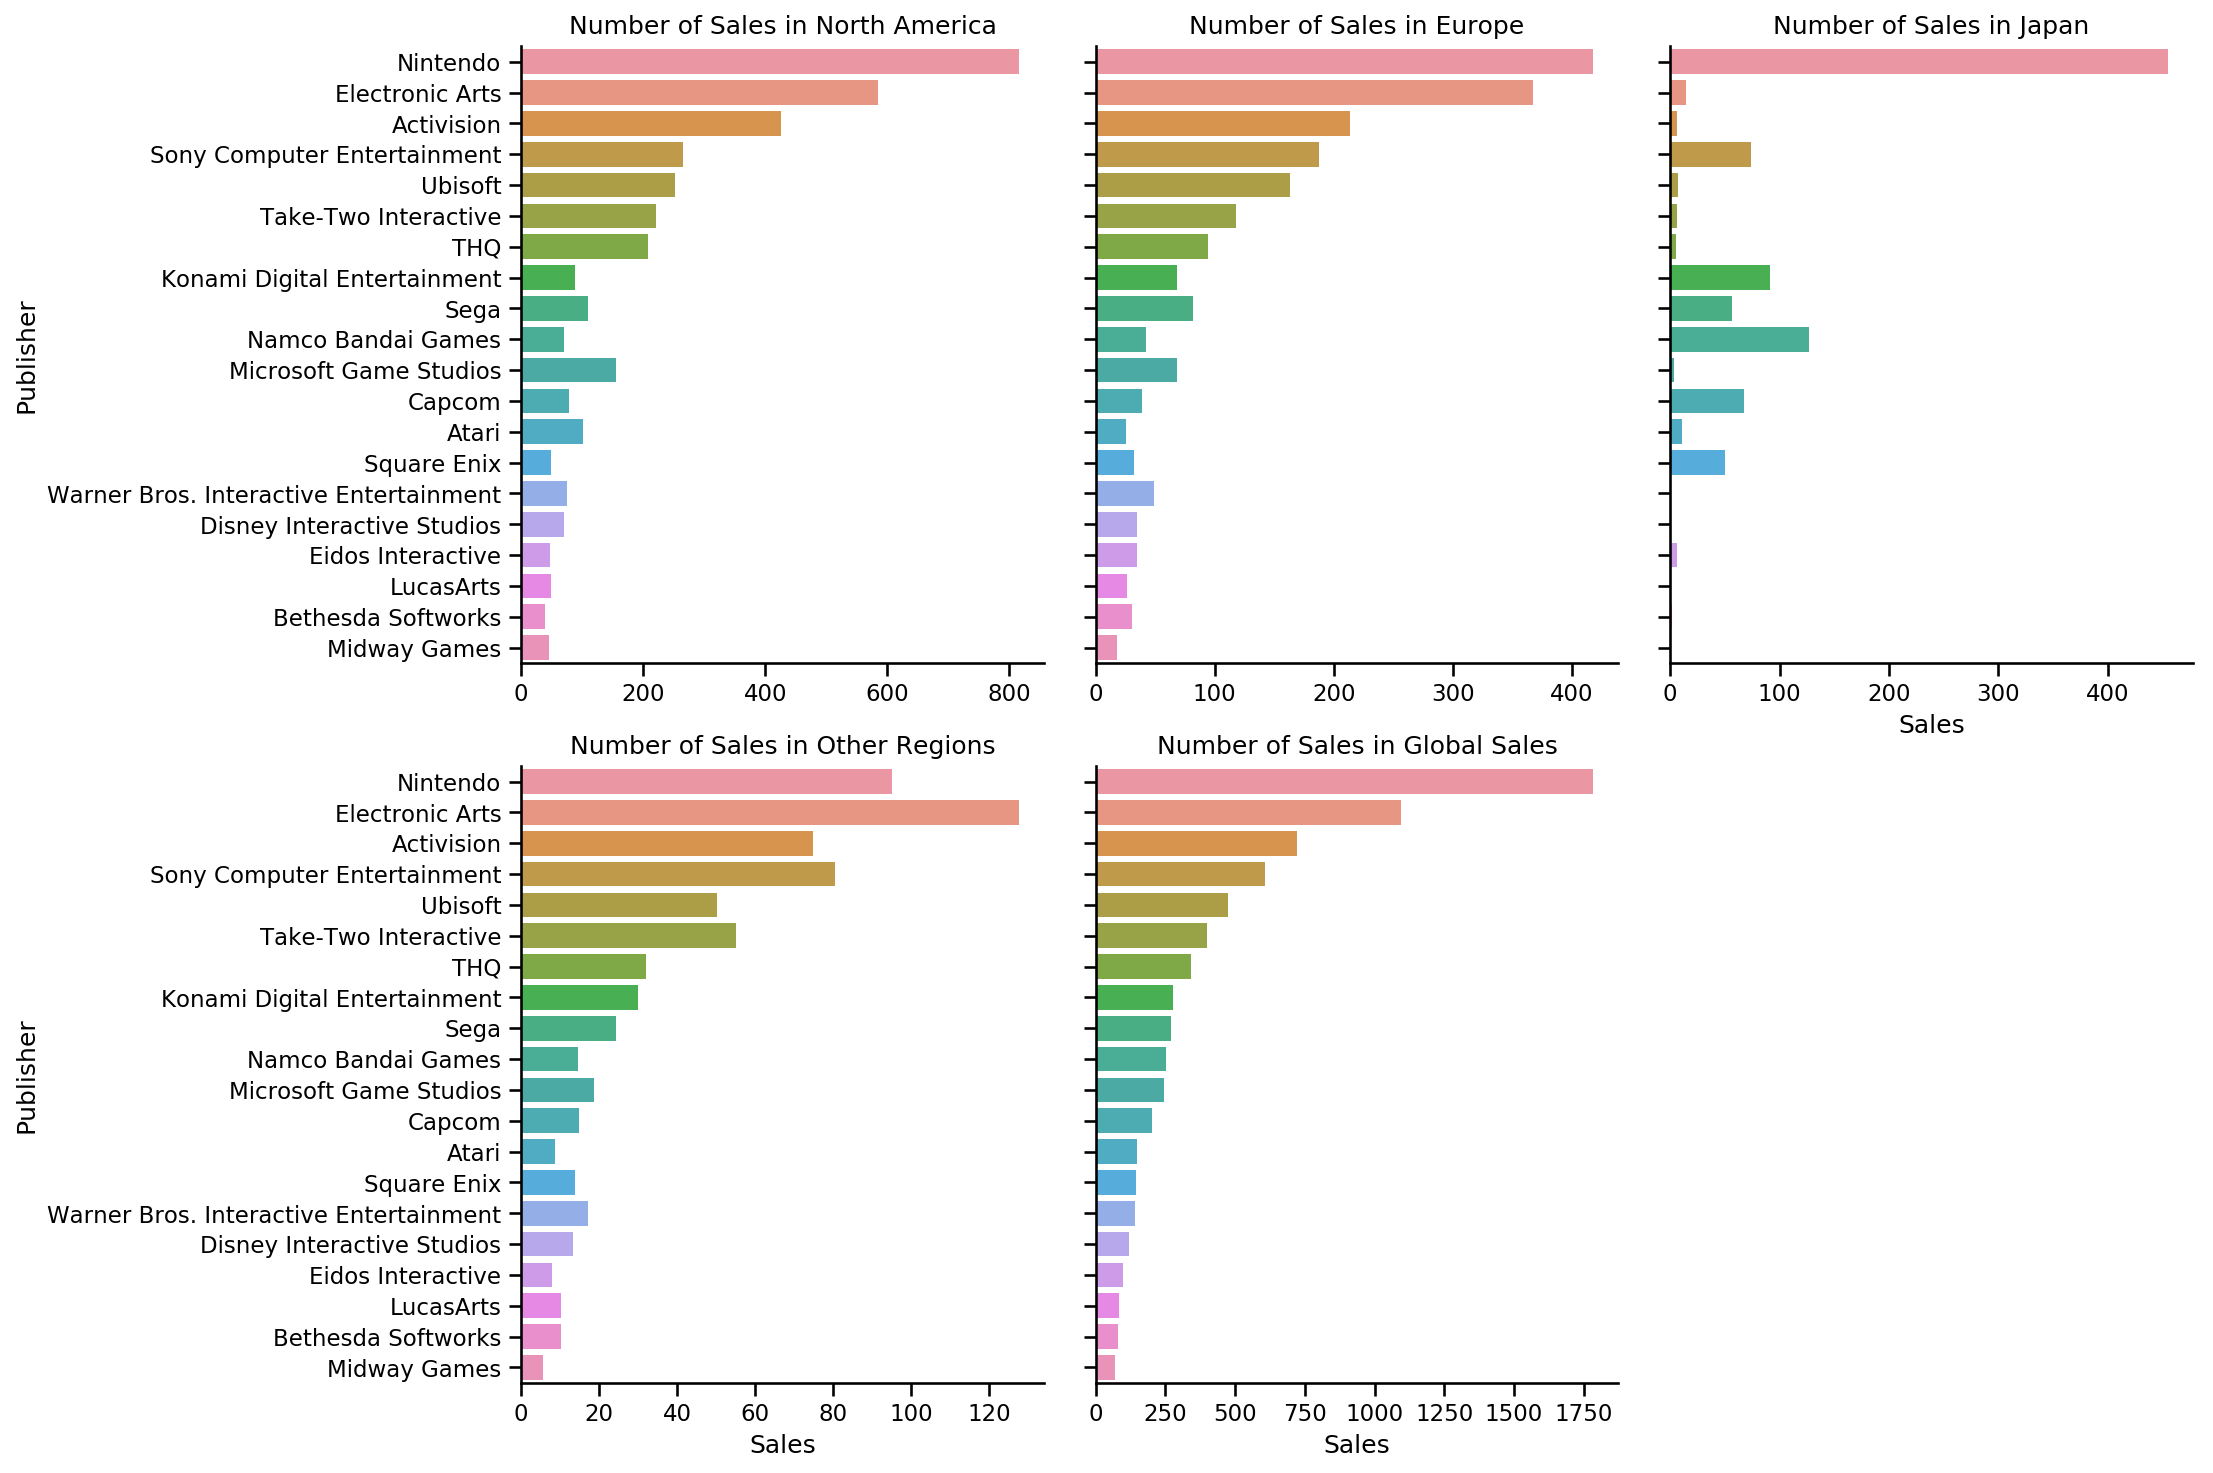

In [32]:
# 'massaging' the data to generate the plot below
pub2 = pub.sort_values('Global_Sales', ascending = False).reset_index().head(20).melt(
    id_vars='Publisher', value_vars=pub.columns, var_name= 'Region',value_name='Sales')

# Replacing the region tags
pub2.Region.replace(to_replace='NA_Sales',value='North America',inplace=True)
pub2.Region.replace(to_replace='EU_Sales',value='Europe',inplace=True)
pub2.Region.replace(to_replace='JP_Sales',value='Japan',inplace=True)
pub2.Region.replace(to_replace='Other_Sales',value='Other Regions',inplace=True)
pub2.Region.replace(to_replace='Global_Sales',value='Global Sales',inplace=True)

# Generating the plot
with sns.plotting_context('notebook'):    
    c = sns.catplot(data= pub2, y='Publisher', x='Sales', col='Region', col_wrap = 3, kind='bar',sharex=False,)
    c.fig.set_dpi(150)
    c.set_titles('Number of Sales in {col_name}')


## Best genre by publisher